# Activation function visualisation

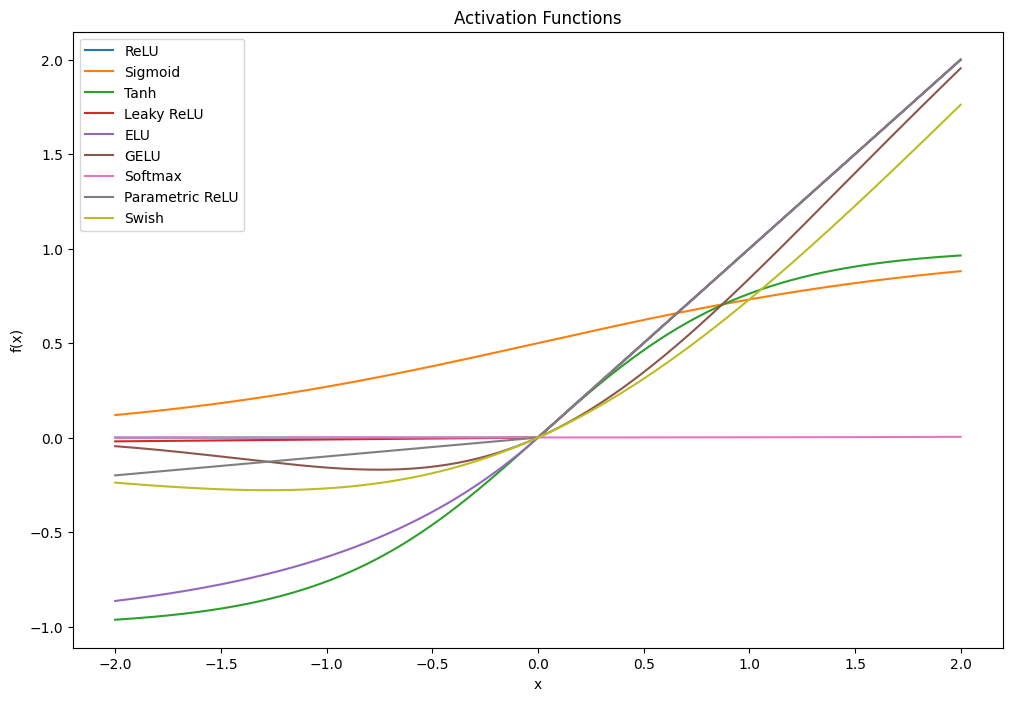

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import erf
import os

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def prelu(x, alpha = 0.1):
    return np.where(x >= 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def gelu(x):
    return x * 0.5 * (1 + erf(x / np.sqrt(2)))

def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0)


def swish(x, beta = 1.0):
    return x * sigmoid(beta * x)

x = np.linspace(-2, 2, 1000)

activation_functions = {
    'ReLU': relu,
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'Leaky ReLU': leaky_relu,
    'ELU': elu,
    'GELU': gelu,
    'Softmax': softmax,
    'Parametric ReLU': prelu,
    'Swish': swish
}

# Ensure the 'visual_outputs' directory exists
if not os.path.exists('visual_outputs'):
    os.makedirs('visual_outputs')

# Create individual plots
for name, func in activation_functions.items():
    plt.figure()
    plt.plot(x, func(x))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(name)
    plt.savefig(f'visual_outputs/{name}.png')
    plt.close()

# Create combined plot
plt.figure(figsize=(12, 8))
for name, func in activation_functions.items():
    plt.plot(x, func(x), label=name)

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Activation Functions')
plt.savefig('visual_outputs/activation_functions.png')
plt.show()


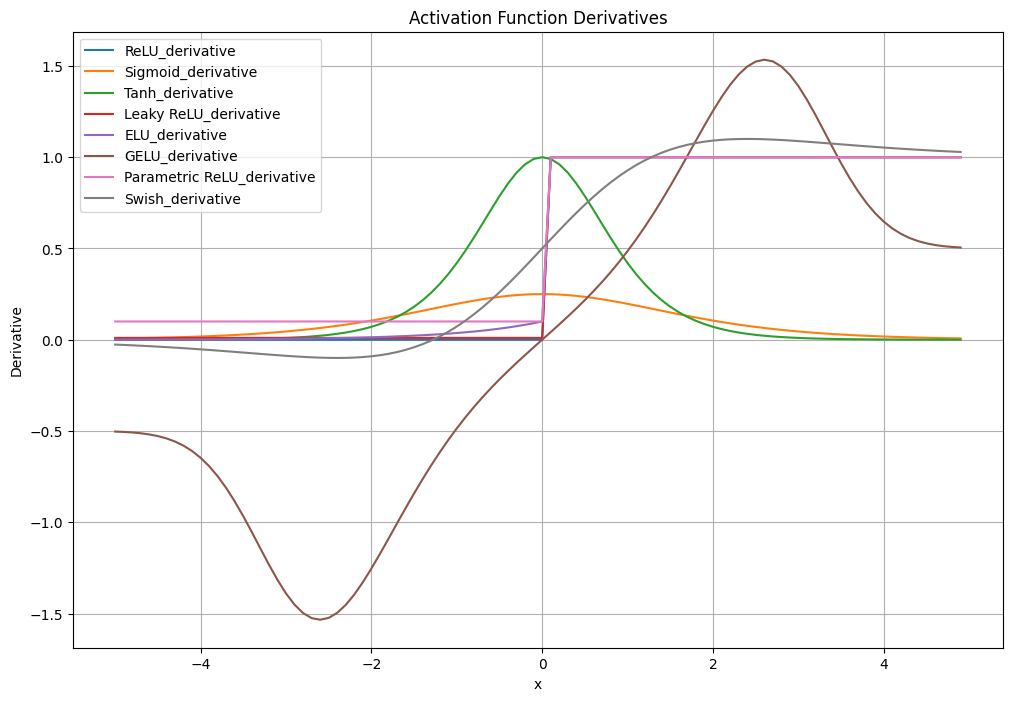

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha = 0.01):
    return np.where(x > 0, 1, alpha)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x ** 3)))

def gelu_derivative(x):
    return (0.5 * np.tanh(0.0356774 * x * (x ** 2 + 1)) + 
            (0.0535161 * x ** 2 + 0.398942) * x * (1 - np.tanh(0.0356774 * x * (x ** 2 + 1)) ** 2))

def elu_derivative(x, alpha = 0.1):
    return np.where(x > 0, 1, alpha * np.exp(x))

def prelu_derivative(x, alpha = 0.1):
    return np.where(x > 0, 1, alpha)

def swish_derivative(x, beta = 1.0):
    s = sigmoid(beta * x)
    return s + beta * x * s * (1 - s)

# 创建一个从 -5 到 5 的等差数列，步长为 0.1
x = np.arange(-5, 5, 0.1)

activation_functions = {
    'ReLU_derivative': relu_derivative,
    'Sigmoid_derivative': sigmoid_derivative,
    'Tanh_derivative': tanh_derivative,
    'Leaky ReLU_derivative': leaky_relu_derivative,
    'ELU_derivative': elu_derivative,
    'GELU_derivative': gelu_derivative,
    'Parametric ReLU_derivative': prelu_derivative,
    'Swish_derivative': swish_derivative
}

# Ensure the 'visual_outputs' directory exists
if not os.path.exists('visual_outputs'):
    os.makedirs('visual_outputs')

# Create individual plots
for name, func in activation_functions.items():
    plt.figure()
    plt.plot(x, func(x))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(name)
    plt.savefig(f'visual_outputs/{name}.png')
    plt.close()
    
# Create combined plot
plt.figure(figsize=(12, 8))
for name, func in activation_functions.items():
    plt.plot(x, func(x), label=name)

plt.xlabel("x")
plt.ylabel("Derivative")
plt.title("Activation Function Derivatives")
plt.legend()
plt.grid(True)
plt.show()


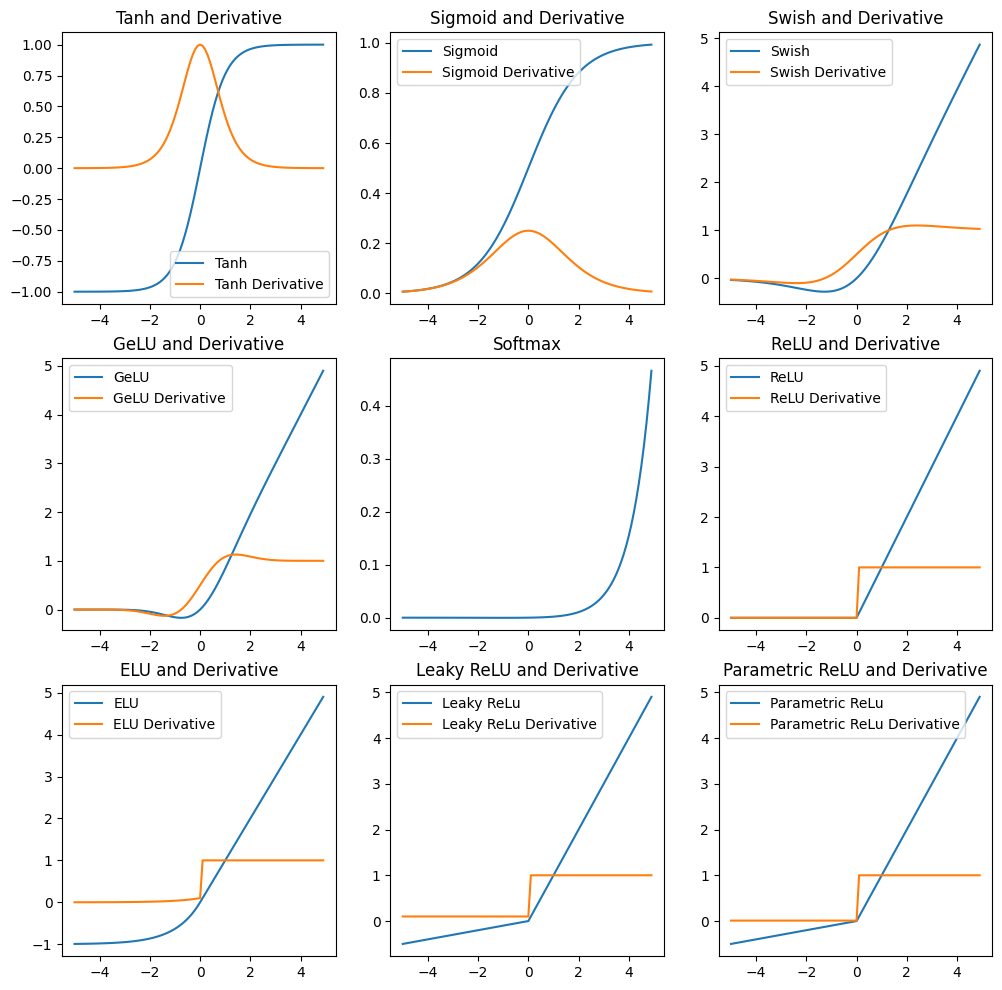

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import erf
import os

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha = 0.1):
    return np.where(x > 0, 1, alpha)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def gelu_derivative(x):
    c = np.sqrt(2/np.pi)
    return 0.5 * (1 + np.tanh(c * (x + 0.044715 * x**3))) + 0.5 * x * (1 - np.tanh(c * (x + 0.044715 * x**3))**2) * c * (1 + 0.134145 * x**2)

def elu_derivative(x, alpha = 0.1):
    return np.where(x > 0, 1, alpha * np.exp(x))

def prelu_derivative(x, alpha =.01):
    return np.where(x > 0, 1, alpha)

def swish_derivative(x, beta = 1.0):
    s = sigmoid(beta * x)
    return s + beta * x * s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def prelu(x, alpha = 0.1):
    return np.where(x >= 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def gelu(x):
    return x * 0.5 * (1 + erf(x / np.sqrt(2)))

def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0)


def swish(x, beta = 1.0):
    return x * sigmoid(beta * x)
    
x = np.arange(-5, 5, 0.1)
alpha = 0.1
beta = 1

y_relu = relu(x)
y_leaky_relu = leaky_relu(x, alpha)
y_tanh = np.tanh(x)
y_sigmoid = sigmoid(x)
y_swish = x * sigmoid(beta * x)
y_softmax = x * softmax(x)
y_elu = elu(x)
y_gelu = gelu(x)
y_prelu = prelu(x)


y_relu_derivative = relu_derivative(x)
y_leaky_relu_derivative = leaky_relu_derivative(x, alpha)
y_tanh_derivative = tanh_derivative(x)
y_sigmoid_derivative = sigmoid_derivative(x)
y_swish_derivative = swish_derivative(x, beta)
y_elu_derivative = elu_derivative(x)
y_gelu_derivative = gelu_derivative(x)
y_prelu_derivative = prelu_derivative(x)

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

axs[0, 0].plot(x, y_tanh, label="Tanh")
axs[0, 0].plot(x, y_tanh_derivative, label="Tanh Derivative")
axs[0, 0].legend()
axs[0, 0].set_title("Tanh and Derivative")

axs[0, 1].plot(x, y_sigmoid, label="Sigmoid")
axs[0, 1].plot(x, y_sigmoid_derivative, label="Sigmoid Derivative")
axs[0, 1].legend()
axs[0, 1].set_title("Sigmoid and Derivative")

axs[0, 2].plot(x, y_swish, label="Swish")
axs[0, 2].plot(x, y_swish_derivative, label="Swish Derivative")
axs[0, 2].legend()
axs[0, 2].set_title("Swish and Derivative")

axs[1, 0].plot(x, y_gelu, label="GeLU")
axs[1, 0].plot(x, y_gelu_derivative, label="GeLU Derivative")
axs[1, 0].legend()
axs[1, 0].set_title("GeLU and Derivative")

axs[1, 1].plot(x, y_softmax, label="Softmax")
axs[1, 1].set_title("Softmax")

axs[1, 2].plot(x, y_relu, label="ReLU")
axs[1, 2].plot(x, y_relu_derivative, label="ReLU Derivative")
axs[1, 2].legend()
axs[1, 2].set_title("ReLU and Derivative")

axs[2, 0].plot(x, y_elu, label="ELU")
axs[2, 0].plot(x, y_elu_derivative, label="ELU Derivative")
axs[2, 0].legend()
axs[2, 0].set_title("ELU and Derivative")

axs[2, 1].plot(x, y_leaky_relu, label="Leaky ReLu")
axs[2, 1].plot(x, y_leaky_relu_derivative, label="Leaky ReLu Derivative")
axs[2, 1].legend()
axs[2, 1].set_title("Leaky ReLU and Derivative")

axs[2, 2].plot(x, y_prelu, label="Parametric ReLu")
axs[2, 2].plot(x, y_prelu_derivative, label="Parametric ReLu Derivative")
axs[2, 2].legend()
axs[2, 2].set_title("Parametric ReLU and Derivative")

plt.savefig('visual_outputs/activation_functions_derivatives.png')

# Loss function visualisation

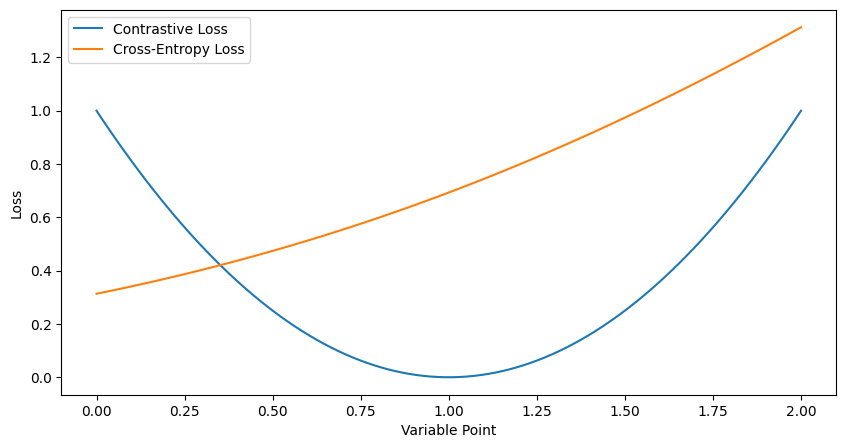

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

# Contrastive Loss
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = (output1 - output2).pow(2).sum(1)
        loss_contrastive = torch.mean((1 - label) * euclidean_distance +
                                      (label) * torch.clamp(self.margin - euclidean_distance, min=0.0))

        return loss_contrastive


# Cross-Entropy Loss
cross_entropy_loss = nn.CrossEntropyLoss()

# Generate sample data
fixed_point = np.array([1.0])
variable_points = np.linspace(0, 2, num=100)

# Calculate Contrastive Loss for each pair of points
contrastive_losses = []
contrastive_loss_function = ContrastiveLoss(margin=1.0)
for variable_point in variable_points:
    output1 = torch.tensor([fixed_point], requires_grad=True)
    output2 = torch.tensor([[variable_point]], requires_grad=True)
    label = torch.tensor([0.0], requires_grad=True)
    loss = contrastive_loss_function(output1, output2, label)
    contrastive_losses.append(loss.item())

# Calculate Cross-Entropy Loss for each pair of points
cross_entropy_losses = []
cross_entropy_loss_function = nn.CrossEntropyLoss()
for variable_point in variable_points:
    output = torch.tensor([[fixed_point[0], variable_point]], requires_grad=True)
    target = torch.tensor([0], dtype=torch.long, requires_grad=False)
    loss = cross_entropy_loss_function(output, target)
    cross_entropy_losses.append(loss.item())

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(variable_points, contrastive_losses, label='Contrastive Loss')
plt.plot(variable_points, cross_entropy_losses, label='Cross-Entropy Loss')
plt.xlabel('Variable Point')
plt.ylabel('Loss')
plt.legend()
plt.show()


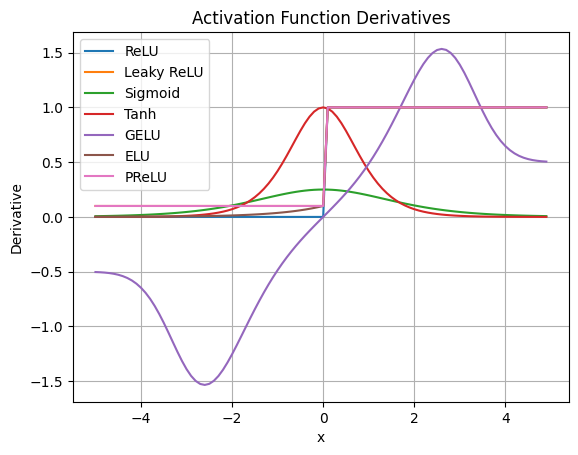

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha):
    return np.where(x > 0, 1, alpha)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x ** 3)))

def gelu_derivative(x):
    return (0.5 * np.tanh(0.0356774 * x * (x ** 2 + 1)) + 
            (0.0535161 * x ** 2 + 0.398942) * x * (1 - np.tanh(0.0356774 * x * (x ** 2 + 1)) ** 2))

def elu_derivative(x, alpha):
    return np.where(x > 0, 1, alpha * np.exp(x))

def prelu_derivative(x, alpha):
    return np.where(x > 0, 1, alpha)

# 创建一个从 -5 到 5 的等差数列，步长为 0.1
x = np.arange(-5, 5, 0.1)

# 设置 alpha 值
alpha = 0.1

# 计算激活函数导数的输出
relu_deriv = relu_derivative(x)
leaky_relu_deriv = leaky_relu_derivative(x, alpha)
sigmoid_deriv = sigmoid_derivative(x)
tanh_deriv = tanh_derivative(x)
gelu_deriv = gelu_derivative(x)
elu_deriv = elu_derivative(x, alpha)
prelu_deriv = prelu_derivative(x, alpha)

# 绘制可视化图像
plt.plot(x, relu_deriv, label='ReLU')
plt.plot(x, leaky_relu_deriv, label='Leaky ReLU')
plt.plot(x, sigmoid_deriv, label='Sigmoid')
plt.plot(x, tanh_deriv, label='Tanh')
plt.plot(x, gelu_deriv, label='GELU')
plt.plot(x, elu_deriv, label='ELU')
plt.plot(x, prelu_deriv, label='PReLU')

plt.xlabel("x")
plt.ylabel("Derivative")
plt.title("Activation Function Derivatives")
plt.legend()
plt.grid(True)
plt.show()
